In [54]:
!pip install pyreadstat

In [5]:
import pyreadstat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Загрузка данных
df, meta = pyreadstat.read_sav('r32i_os_73.sav')

# Словарь колонок
columns = {
    # ДЕМОГРАФИЧЕСКИЕ ХАРАКТЕРИСТИКИ
    'bb_diplom': 'education_level',          # Уровень образования
    'bb_age': 'age',                         # Возраст респондента
    'bbh5': 'gender',                        # Пол (мужской/женский)
    
    # УДОВЛЕТВОРЕННОСТЬ ЖИЗНЬЮ
    'bbj65': 'life_satisfaction',            # Общая удовлетворенность жизнью
    'bbj66.1': 'financial_satisfaction',     # Удовлетворенность финансовым положением
    
    # ЛИЧНОСТНЫЕ ХАРАКТЕРИСТИКИ
    'bbj445.1': 'talkativeness',             # Разговорчивость
    'bbj445.2': 'work_accuracy',             # Точность в работе
    'bbj445.3': 'creativity',                # Креативность
    'bbj445.4': 'reserved_opinions',         # Сдержанность в выражении мнений
    'bbj445.5': 'stress_tolerance',          # Устойчивость к стрессу
    'bbj445.6': 'task_completion',          # Доведение задач до конца
    'bbj445.7': 'exploitability',           # Склонность позволять другим пользоваться собой
    'bbj445.8': 'work_ethic',               # Трудовая этика
    'bbj445.9': 'forgiveness',              # Способность прощать
    'bbj445.10': 'anxiety',                 # Тревожность
    'bbj445.11': 'curiosity',               # Любознательность
    'bbj445.12': 'preference_leisure',      # Предпочтение досуга работе
    'bbj445.13': 'long_term_focus',         # Ориентация на долгосрочные цели
    'bbj445.14': 'aesthetic_appreciation',  # Восприятие прекрасного
    'bbj445.15': 'future_orientation',      # Ориентация на будущее
    'bbj445.16': 'politeness',              # Вежливость
    'bbj445.17': 'work_efficiency',         # Эффективность в работе
    'bbj445.18': 'nervousness',             # Нервозность
    'bbj445.19': 'generosity',              # Щедрость
    'bbj445.20': 'sociability',             # Общительность
    'bbj445.21': 'decision_carefulness',    # Осторожность в принятии решений
    'bbj445.22': 'perceived_hostility',     # Воспринимаемая враждебность окружения
    
    # РИСКОВАННОЕ ПОВЕДЕНИЕ
    'bbj446': 'general_risk',             # Общая склонность к риску
    'bbj447.1': 'driving_risk',             # Рискованное вождение
    'bbj447.2': 'financial_risk',           # Финансовый риск
    'bbj447.4': 'health_risk',              # Риск для здоровья
    'bbj447.5': 'health_risk_willingness',  # Готовность рисковать здоровьем
    'bbj448': 'future_sacrifice',           # Готовность отказаться от чего-то сегодня ради выгоды в будущем
    
    # ЗДОРОВЬЕ И АНТРОПОМЕТРИЯ
    'bbm1': 'weight_kg',                    # Вес в килограммах
    'bbm2': 'height_cm',                    # Рост в сантиметрах
    'bbm3': 'self_rated_health',            # Самооценка здоровья
    'bbm20.63': 'liver_disease',            # Наличие заболеваний печени
    'bbm20.64': 'kidney_disease',           # Наличие заболеваний почек
    'bbl58': 'recent_health_issues',        # Проблемы со здоровьем за последние 30 дней
    
    # КУРЕНИЕ
    'bbm71': 'smoking_status',              # Текущий статус курения
    'bbm73': 'smoking_last_week',           # Курение в последние 7 дней
    'bbm75.1': 'cigarettes_per_day',        # Количество сигарет в день
    
    # АЛКОГОЛЬ (ОБЩИЕ ВОПРОСЫ)
    'bbm80': 'alcohol_use',                 # Употребление алкоголя
    'bbm80.0': 'alcohol_ever_used',         # Пробовал ли алкоголь
    'bbm82.1': 'alcohol_before_meal',       # Употребление алкоголя до еды
    'bbm82.3': 'alcohol_without_meal',      # Употребление алкоголя без еды
    'bbm83.2': 'alcohol_at_bars',           # Употребление в барах
    'bbm83.3': 'alcohol_outdoors',          # Употребление на улице
    'bbm83.4': 'alcohol_at_work',           # Употребление на работе
    'bbm83.5': 'alcohol_at_parties',        # Употребление на вечеринках
}

# Проверка, какие из этих колонок присутствуют в датасете
existing_columns = [col for col in columns.keys() if col in df.columns]

# Переименовываем столбцы в соответствии с словарем
df = df[existing_columns]
df.rename(columns=columns, inplace=True)

# Очистка данных от некорректных значений
df.replace({88888888: np.nan, 99999996: np.nan, 99999997: np.nan, 99999998: np.nan, 99999999: np.nan}, inplace=True)

# Проверим количество пропусков и уникальные значения в 'general_risk'
print(df['general_risk'].isnull().sum())  # Количество пропусков
print(df['general_risk'].unique())  # Уникальные значения в столбце

# Импутация пропущенных значений для 'general_risk'
# Для числовых переменных используем медиану, для категориальных - моду
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Импутация пропусков в числовых данных
df[numerical_columns] = pd.DataFrame(num_imputer.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Импутация пропусков в категориальных данных
df[categorical_columns] = pd.DataFrame(cat_imputer.fit_transform(df[categorical_columns]), columns=categorical_columns)

# Проверим результаты
print(f"После импутации пропусков в 'general_risk': {df['general_risk'].isnull().sum()}")

# Разделение данных на 80% (основная часть) и 20% (тестовая/валидационная)
df_80, df_20 = train_test_split(df, test_size=0.2, random_state=42)

# Сохранение тестового датасета df_20 в .csv
df_20.to_csv('test_dataset.csv', index=False)

# Применение метода главных компонент (PCA)
pca = PCA(n_components=2)  # Уменьшаем размерность до 2 компонентов для визуализации
principal_components = pca.fit_transform(df_80[numerical_columns])

# Добавление главных компонент в DataFrame
df_80['PCA1'] = principal_components[:, 0]
df_80['PCA2'] = principal_components[:, 1]

# Визуализация распределения данных в 2D после PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_80, hue='gender', palette='coolwarm', s=100, alpha=0.7)
plt.title('Распределение данных после PCA (2 компоненты)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Вычисление склонности (среднее нормализованных значений)
df_80['tendency'] = df_80[numerical_columns].mean(axis=1)

# Нормализация (Min-Max Scaling) для всех числовых признаков
tendency_values = df_80['tendency'].values.reshape(-1, 1)  # Преобразуем в 2D-массив
scaler = MinMaxScaler()
df_80['tendency'] = scaler.fit_transform(tendency_values).flatten()  # Возвращаем к 1D

# Визуализация нового распределения склонности
plt.figure(figsize=(10, 6))
sns.histplot(df_80['tendency'], kde=True, color='blue', bins=20)
plt.title('Распределение склонности после нормализации')
plt.xlabel('Нормализованная склонность')
plt.ylabel('Частота')
plt.show()

# Сохранение итогового датасета с колонкой tendency в .csv
df_80.to_csv('final_dataset_with_tendency.csv', index=False)


2531
[ 0. 10.  3.  2.  6. nan  5.  4.  7.  8.  1.  9.]


NameError: name 'numerical_columns' is not defined

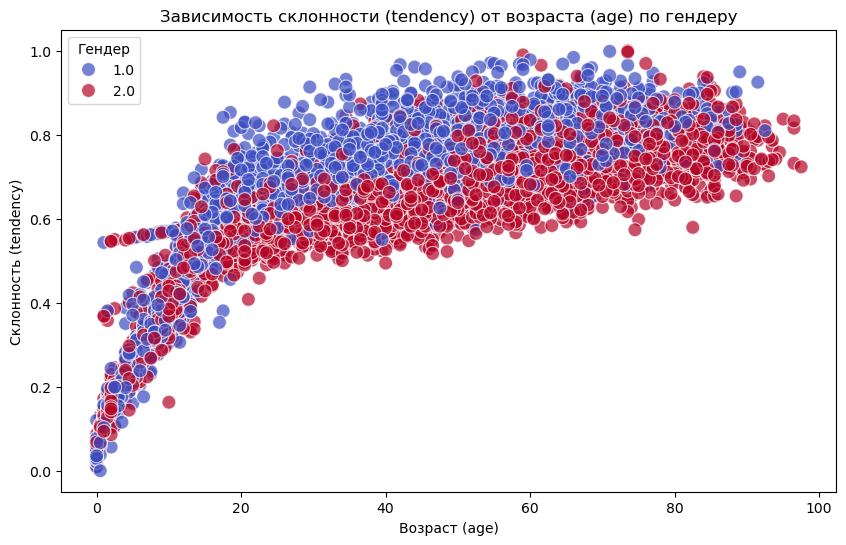

C:\Users\Sanya1337\AppData\Local\Temp\ipykernel_12360\1463966803.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='education_level', y='tendency', data=df_80, palette='coolwarm')


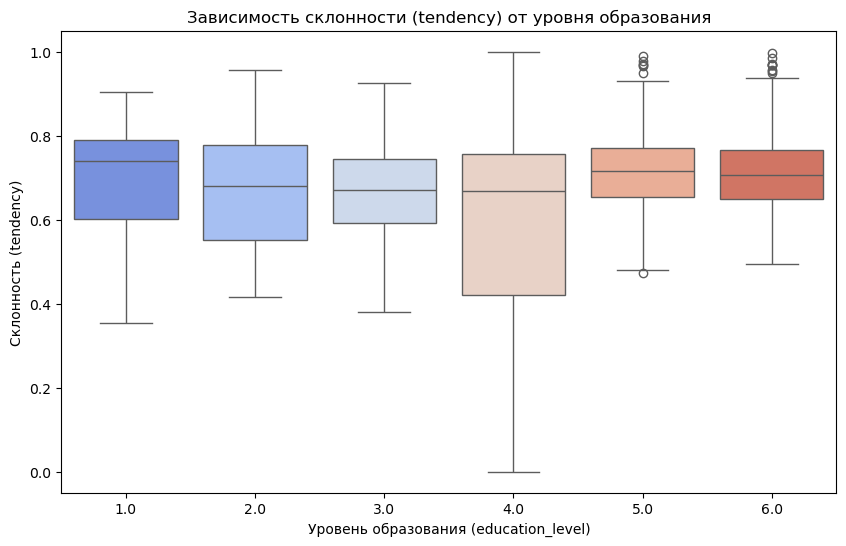

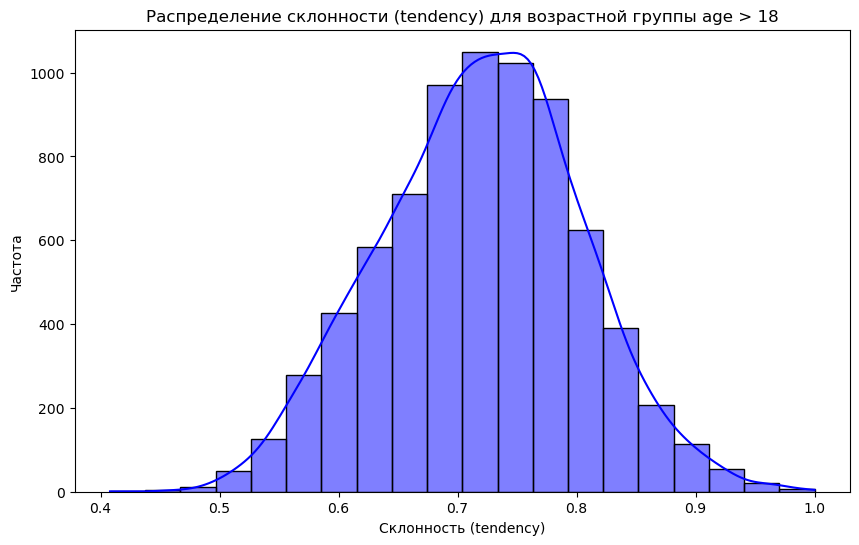

In [252]:
# 1) Зависимость tendency от age (с параметром гендера по цвету)
plt.figure(figsize=(10, 6))
sns.scatterplot(data = df_80, x='age', y='tendency', hue='gender', palette='coolwarm', s=100, alpha=0.7)
plt.title('Зависимость склонности (tendency) от возраста (age) по гендеру')
plt.xlabel('Возраст (age)')
plt.ylabel('Склонность (tendency)')
plt.legend(title='Гендер')
plt.show()

# 2) Зависимость tendency от уровня образования
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_level', y='tendency', data=df_80, palette='coolwarm')
plt.title('Зависимость склонности (tendency) от уровня образования')
plt.xlabel('Уровень образования (education_level)')
plt.ylabel('Склонность (tendency)')
plt.show()

# 3) Распределение tendency для age > 18
df_age_above_18 = df_80[df_80['age'] > 18]  # Фильтруем данные для возраста > 18
plt.figure(figsize=(10, 6))
sns.histplot(df_age_above_18['tendency'], kde=True, color='blue', bins=20)
plt.title('Распределение склонности (tendency) для возрастной группы age > 18')
plt.xlabel('Склонность (tendency)')
plt.ylabel('Частота')
plt.show()

In [7]:
# 3) Распределение tendency для age > 18
df_age_18 = df_80[df_80['age'] < 18]  # Фильтруем данные для возраста < 18
plt.figure(figsize=(10, 6))
sns.histplot(df_age_18['tendency'], kde=True, color='blue', bins=20)
plt.title('Распределение склонности (tendency) для возрастной группы age < 18')
plt.xlabel('Склонность (tendency)')
plt.ylabel('Частота')
plt.show()

NameError: name 'df_80' is not defined

In [1]:
df_age_18 = df_80[(df_80['age'] > 18)] 
# Отбираем нужные столбцы
df_selected = df_age_18[['tendency','age', 'education_level', 'gender', 'financial_satisfaction', 'self_rated_health', 'smoking_status','weight_kg','height_cm', 'kidney_disease']]

# Преобразуем категориальные переменные в числовые для вычисления корреляции
df_selected['education_level'] = df_selected['education_level'].astype('category').cat.codes
df_selected['gender'] = df_selected['gender'].astype('category').cat.codes
df_selected['smoking_status'] = df_selected['smoking_status'].astype('category').cat.codes

# Вычисление корреляции
correlation_matrix = df_selected.corr()

# Визуализация тепловой карты корреляций
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Тепловая карта корреляций для выбранных столбцов')
plt.show()


NameError: name 'df_80' is not defined

In [266]:
df_selected.describe()

,age,education_level,gender,financial_satisfaction,self_rated_health,smoking_status
count,9456.00000,9456.00000,9456.00000,9456.00000,9456.00000,9456.00000
mean,43.57276,3.48213,0.57688,3.31631,2.63822,0.80309
std,23.04320,1.14478,0.49408,1.03318,0.71646,0.39769
min,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000
25%,23.50000,3.00000,0.00000,3.00000,2.00000,1.00000
50%,44.50000,3.00000,1.00000,3.00000,3.00000,1.00000
75%,62.50000,4.00000,1.00000,4.00000,3.00000,1.00000
max,97.50000,5.00000,1.00000,5.00000,5.00000,1.00000
